# Project Temperature/Time Series

## Time Series Data

"An obvious characteristic of time series data that distinguishes it from cross-sectional data is temporal ordering." - Introductory Econometrics, J. Wooldridge

Time Series data has (or can have) the following components:
1. Trend
- Seasonality
- Remainder:
    - Randomness
    - Time Dependence

## Time Series Analysis

Time Series Analysis is a field of statistical Analysis that deals with modelling **time dependence**. The other properties of time series will have to be taken into account in order to model it, but the time dependence is what we try to understand in time series analysis. Thereby, we can extract meaningful information from the past.

Ask yourself the question:
Is there meaningful information in the past observations of the time series that cannot be captured by any covarying variable?
If the answer is **yes**, that is when time series analysis comes into play. This could be the case if we either can't model any other relationship or we cannot access the necessary data.

## Topics we will cover this week

**Time Series:**

- Decompose time series data into its different components
- Use a naive forecast as a baseline model
- Learn how to use Autoregressive (AR) and Autoregressive-Integrated-Moving-Average (ARIMA) Models to predict the future.
- Evaluate your forecasts

**Miscellaneous:**

- Distribution Functions
- Python Namespaces
- Useful Python Modules
- Plotting on Maps

## Main Project Goal

- Understand the purpose of and the idea behind time series analysis
- Be able to make short term temperature forecasts

## Possible project results at the end of the week

- Data Wrangling: Create a large dataset of climate data from individual files
- Interactive Visualizations: geojson, geopandas, folium/ plotly library
- Forecasting: Create a model that is able to make short term temperature forecasts (using statsmodels, sklearn, sktime or fbprophet) and evaluate their performance

# Time Series Decomposition

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

## Step 1 - Load the Data

In [3]:
# Load the flights dataset from seaborn
df = sns.load_dataset('flights')

df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Step 2 - Plot the time series

In [8]:
# Combine the month and year column and make a new column out of it
df['date'] = pd.to_datetime(df['year'].astype(str) + ' ' + df['month'].astype(str))

df.head()

,year,month,passengers,date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


In [13]:
# Set the new columns as the index
df.set_index('date', inplace = True)

df.head()

,year,month,passengers
date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


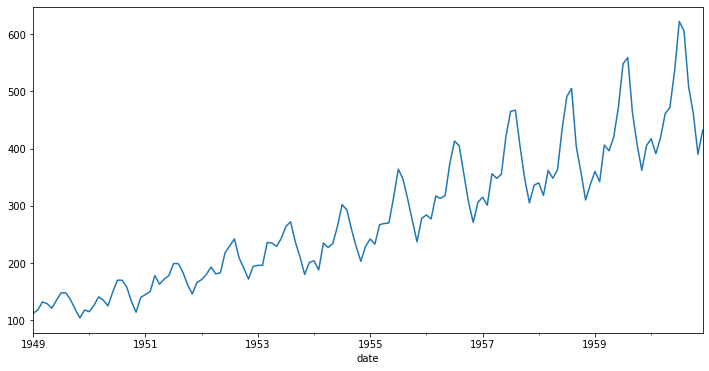

In [15]:
# Plot the series
df['passengers'].plot()

## Step 3 - Remove the trend

- Differencing - if the trend is linear
- Second order differencing - if the trend is quadratic

### 3.1) Differencing

In [16]:
df['passengers'].diff()

date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: passengers, Length: 144, dtype: float64

In [22]:
# Create a column with the differences of passengers
df['difference'] = df['passengers'].diff()

df.head()

,year,month,passengers,difference
date,,,,
1949-01-01,1949,January,112,NaN
1949-02-01,1949,February,118,6.0
1949-03-01,1949,March,132,14.0
1949-04-01,1949,April,129,-3.0
1949-05-01,1949,May,121,-8.0


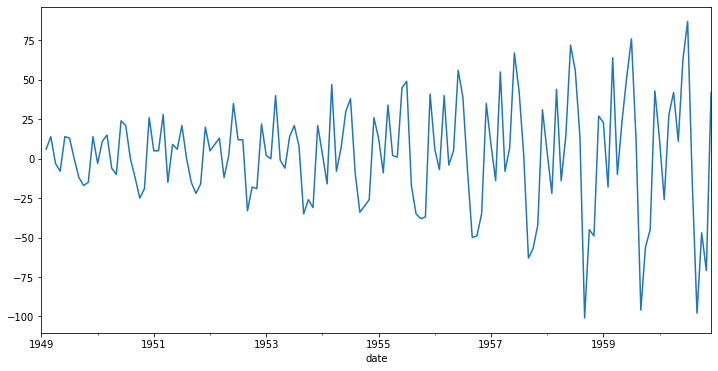

In [23]:
# Plot the result
df['difference'].plot()

In [24]:
# Look at the mean
df['difference'].mean()

2.237762237762238

### 1.2) Second order differencing

Second order differencing is used if the time series has an quadratic trend rather than a linear trend.

In [25]:
# Create a column with the differences of passengers
df['second_order_difference'] = df['difference'].diff()

df.head()

,year,month,passengers,difference,second_order_difference
date,,,,,
1949-01-01,1949,January,112,NaN,NaN
1949-02-01,1949,February,118,6.0,NaN
1949-03-01,1949,March,132,14.0,8.0
1949-04-01,1949,April,129,-3.0,-17.0
1949-05-01,1949,May,121,-8.0,-5.0


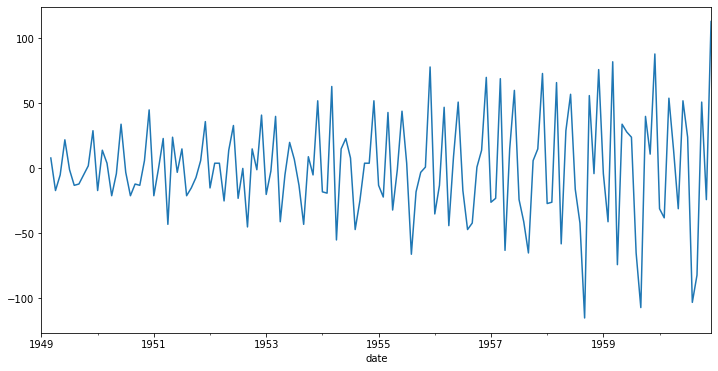

In [26]:
# Plot the result
df['second_order_difference'].plot()

This could be a linear trend or maybe exponential trend.

How to deal with it: fit a linear regression on a timestamp (and, or a squared timestamp) to figure out wheter there is evidence for a trend and which kind of tren might describe the trend best.

hint: this week we will generally use statsmodels rather than sklearn.

In [27]:
from statsmodels.api import OLS, add_constant

In [ ]:
# create a timestamp variable

df['timestep'] = 

## Step 4 - Remove trend and changes in volatility

**Only do this if the time series shows changes in volatility, this might not be the case in the project!!!**

In [ ]:
# Create a column with the percentage change of passenger numbers

In [ ]:
# Plot the result

## Step 5 - Remove the seasonality

Demean each value by subtracting the monthly mean.

In [ ]:
# Calculate the monthly mean percentage change of passenger numbers

In [ ]:
# Create a new column

In [ ]:
# Demean the percentage change

In [ ]:
# Plot the result

## This is the time series we will actually do our analysis on!

1. We make predictions for the `df['deseasonalized']`
- We add back on the monthly_mean
- We take the first value and create whole log_series
- We exponentiate the values to arrive back at the acutal values

## Step 6 - Run a time series model on the remainder

## Step 7 - Reconstruct actual values from predictions

## Hint - statsmodels

In [ ]:
# Import seasonal_decompose from statsmodels